In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, Flatten, Conv2D,Lambda
#from keras.layers import BatchNormalization
from keras_resnet.layers import BatchNormalization
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D,UpSampling2D,Concatenate,Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#from keras.models import load_model
#import pydot
from keras_retinanet.models import load_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.callbacks import LearningRateScheduler,Callback
from keras.optimizers import RMSprop,SGD
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import glob
import cv2
import os
from math import *
from keras.applications.vgg16 import VGG16 
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import h5py
from keras.utils import to_categorical
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from keras.preprocessing.image import ImageDataGenerator
from skimage import measure
from imutils import contours
import imutils
get_ipython().run_line_magic('matplotlib', 'inline')


In [4]:
def ODmodel1():
    odmodel = load_model('ResNet-50-model.keras.h5', backbone_name='resnet50')
    #odmodel = VGG16(weights='imagenet', input_shape = (224,224,3),  include_top=False)
    odmodel.layers.pop()
    
    for layer in odmodel.layers:
        layer.trainable = False
    
    
    inputs = odmodel.layers[0].output
    #conv53 = odmodel.layers[17].output
    conv53x = odmodel.layers[151].output
    M5 = Conv2D(256,(1,1),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='BABLUBABLU')(conv53x)
    conv53 = Conv2D(256,(3,3),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='BABLUBABLU1')(M5)
    conv5_output = Conv2DTranspose(512,(3,3),padding='same',strides=(2,2),kernel_initializer='he_uniform')(conv53)
    M5_upsample = UpSampling2D(size=(2,2))(M5)
    #conv43 = odmodel.layers[13].output
    conv43x = odmodel.layers[84].output
    conv43_111 = Conv2D(256,(1,1),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='BABLUBABLU2')(conv43x)
    #conv43_befupsamp = Conv2D(256,(3,3),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='BABLUBABLU3')(conv43_111)
    #conv4_forupsample = UpSampling2D(size=(2,2))(conv43_111)
    M4 = Concatenate()([M5_upsample,conv43_111])
    conv43 = Conv2D(256,(3,3),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='BABLUBABLU3')(M4)
    M4_upsample = UpSampling2D(size=(2,2))(M4) 
    
    
    conv33x = odmodel.layers[37].output
    conv33_111 = Conv2D(256,(1,1),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='BABLUBABLU4')(conv33x)
    M3 = Concatenate()([M4_upsample,conv33_111])
    conv33 = Conv2D(256,(3,3),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='BABLUBABLU5')(M3)
    M3_upsample = UpSampling2D(size=(2,2))(M3) 
    
    
    conv22x = odmodel.layers[2].output
    conv22_111 = Conv2D(256,(1,1),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='BABLUBABLU6')(conv22x)
    M2 = Concatenate()([M3_upsample,conv22_111])
    conv22 = Conv2D(256,(3,3),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='BABLUBABLU7')(M2)
    #M3_upsample = UpSampling2D(size=(2,2))(M3)
    #conv22 = Conv2D(256,(3,3),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='BABLUBABLU7')(conv22_111)
    
    
    
    
    
    
    
    
    
    D11 = Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD11')(conv43)
    #drop11 = Dropout(0.2)(D11)
    D12 = BatchNormalization(axis = 3,freeze = True, name = 'bnD11')(D11)
    D13 = Activation('relu')(D12)
    D14 = Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD12')(D13)
    #drop12 = Dropout(0.2)(D14)
    D15 = BatchNormalization(axis = 3, freeze = True,name = 'bnD12')(D14)
    D1_output = Activation('relu')(D15)
    
    #conv33 = odmodel.layers[9].output
    
    D21 = Conv2D(128,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD21')(conv33)
   # drop21 = Dropout(0.2)(D21)
    D22 = BatchNormalization(axis = 3,freeze = True, name = 'bnD21')(D21)
    D23 = Activation('relu')(D22)
    D24 = Conv2D(128,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD22')(D23)
    #drop22 = Dropout(0.2)(D24)
    D25 = BatchNormalization(axis = 3,freeze = True, name = 'bnD22')(D24)
    D2_output = Activation('relu')(D25)

    #conv22 = odmodel.layers[5].output
    
    D31 = Conv2D(64,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD31')(conv22)
   # drop31 = Dropout(0.2)(D31)
    D32 = BatchNormalization(axis = 3,freeze = True, name = 'bnD31')(D31)
    D33 = Activation('relu')(D32)
    D34 = Conv2D(64,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD32')(D33)
    #drop32 = Dropout(0.2)(D34)
    D35 = BatchNormalization(axis = 3,freeze = True, name = 'bnD32')(D34)
    D3_output = Activation('relu')(D35)
    
    decon11 = Concatenate()([D1_output,conv5_output])
    decon12 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv11')(decon11)
    decon13 = BatchNormalization(axis = 3,freeze = True, name = 'bnde11')(decon12)
    decon14 = Activation('relu')(decon13)
    decon15 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv12')(decon14)
    decon16 = BatchNormalization(axis = 3,freeze = True, name = 'bnde12')(decon15)
    decon17 = Activation('relu')(decon16)
    decon1_output = Conv2DTranspose(256,(3,3),padding='same',strides=(2,2),kernel_initializer='he_uniform')(decon17)
    #decon18 = UpSampling2D(size=(2,2))(decon17)
    #decon1_output = Conv2DTranspose(256,(3,3),padding='same',strides=(1,1),kernel_initializer='he_uniform')(decon18)
    
    decon21 = Concatenate()([D2_output,decon1_output])
    decon22 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv21')(decon21)
    decon23 = BatchNormalization(axis = 3, freeze = True,name = 'bnde21')(decon22)
    decon24 = Activation('relu')(decon23)
    decon25 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv22')(decon24)
    decon26 = BatchNormalization(axis = 3, freeze = True,name = 'bnde22')(decon25)
    decon27 = Activation('relu')(decon26)
    decon2_output =Conv2DTranspose(256,(3,3),padding='same',strides=(2,2),kernel_initializer='he_uniform')(decon27)
    #decon28 = UpSampling2D(size=(2,2))(decon27)
    #decon2_output = Conv2DTranspose(256,(3,3),padding='same',strides=(1,1),kernel_initializer='he_uniform')(decon28)
    
    decon31 = Concatenate()([D3_output,decon2_output])
    decon32 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv31')(decon31)
    decon33 = BatchNormalization(axis = 3,freeze = True, name = 'bnde31')(decon32)
    decon34 = Activation('relu')(decon33)
    decon35 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv32')(decon34)
    decon36 = BatchNormalization(axis = 3,freeze = True, name = 'bnde32')(decon35)
    decon37 = Activation('relu')(decon36)
    decon3_output = Conv2DTranspose(256,(3,3),padding='same',strides=(2,2),kernel_initializer='he_uniform')(decon37)
    #decon38 = UpSampling2D(size=(2,2))(decon37)
    #decon3_output = Conv2DTranspose(256,(3,3),padding='same',strides=(1,1),kernel_initializer='he_uniform')(decon38)
    
    decon41 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv41')(decon3_output)
    decon42 = BatchNormalization(axis = 3,freeze = True, name = 'bnde41')(decon41)
    decon43 = Activation('relu')(decon42)
    decon44 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv42')(decon43)
    decon45 = BatchNormalization(axis = 3,freeze = True, name = 'bnde42')(decon44)
    decon4_output = Activation('relu')(decon45)
    
    decon5_output = Conv2D(1,(1,1),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='decon52')(decon4_output)
    #decon52 = Flatten()(decon51)
    #decon5_output = Lambda(lambda x: x*255)(decon51)
    
    layers = decon5_output
    
    model = Model(inputs,layers,name = "ODModel")
    #print(model.get_weights())
    #model.load_weights(weights_path,by_name=True)
    #print(model.get_weights())
    
    print(model.summary())
    return model



In [5]:
odmodel = ODmodel1()

/home/sumeet/.virtualenvs/dl4cv/lib/python3.5/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9408        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu

In [4]:
imgs_gt =[]
imgs_o = []
count_gt = 0
count_o = 0
for j in range(10):
    #print(j + 1)
    img_cnt = str(j + 1)
    img_path_gt = 'Images_for_FCRN/New/img' + img_cnt + '/gt'
    img_path_o = 'Images_for_FCRN/New/img' + img_cnt + '/o'
    for i in range((len(os.listdir(img_path_gt)))):
        cnt = str(i + 1)
        path_gt = img_path_gt + '/img' + img_cnt + '_' + cnt + 'gt.jpg'
        img_gt = cv2.imread(path_gt)
        img_gt = cv2.cvtColor(img_gt,cv2.COLOR_RGB2GRAY)
        if img_gt.shape == (224,224):
            imgs_gt.append(img_gt)
            count_gt = count_gt + 1
            #added for aug
            """
            rotated = imutils.rotate(img_gt,45)
            imgs_gt.append(rotated)
            rotated = imutils.rotate(img_gt,80)
            imgs_gt.append(rotated)
            rotated = imutils.rotate(img_gt,102)
            imgs_gt.append(rotated)
            rotated = imutils.rotate(img_gt,135)
            imgs_gt.append(rotated)
            rotated = imutils.rotate(img_gt,160)
            imgs_gt.append(rotated)
            count_gt = count_gt + 5
            """
        path_o = img_path_o + '/img' + img_cnt + '_' + cnt + 'o.jpg'
        img_o = cv2.imread(path_o)
        img_o = cv2.cvtColor(img_o, cv2.COLOR_BGR2RGB)
        if img_o.shape == (224,224,3):
            imgs_o.append(img_o)
            count_o = count_o + 1
            """
            rotated = imutils.rotate(img_o,45)
            imgs_o.append(rotated)
            rotated = imutils.rotate(img_o,80)
            imgs_o.append(rotated)
            rotated = imutils.rotate(img_o,102)
            imgs_o.append(rotated)
            rotated = imutils.rotate(img_o,135)
            imgs_o.append(rotated)
            rotated = imutils.rotate(img_o,160)
            imgs_o.append(rotated)
            count_o = count_o + 5
            """

print(count_o)
print(count_gt)

3696
3696


In [5]:
'''
for i in range(1,501):
    img_cnt = str(i)
    image_o = cv2.imread('Images_for_FCRN/Black/o/img_' + img_cnt + 'o.jpg')
    image_o = cv2.cvtColor(image_o, cv2.COLOR_BGR2RGB)
    imgs_o.append(image_o)
    image_gt = cv2.imread('Images_for_FCRN/Black/gt/img_' + img_cnt + 'gt.jpg')
    image_gt = cv2.cvtColor(image_gt,cv2.COLOR_RGB2GRAY)
    imgs_gt.append(image_gt)
    count_gt = count_gt + 1
    count_o = count_o + 1
print(count_gt,' ',count_o)
'''
imgs_gt = np.asarray(imgs_gt)
imgs_gt = imgs_gt.reshape((3696,224,224,1))
imgs_o = np.asarray(imgs_o)
print(imgs_gt.shape)
print(imgs_o.shape)


(3696, 224, 224, 1)
(3696, 224, 224, 3)


In [26]:
class LossHistory(Callback):
    def on_train_begin(self,logs={}):
        self.losses=[]
        self.lr = []
        
    def on_epoch_end(self,batch,logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.1
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

lrate = LearningRateScheduler(exp_decay)

class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

loss_history = LossHistory()
callbacks_list = [loss_history,plot,ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=50)]
#callbacks_list = [loss_history,plot,ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=50)]

In [27]:
lr_rate = 0.001
decay_rate = lr_rate/5;

#my_optimizer = SGD(lr=0.01, decay=lr_rate/200, momentum=10, nesterov=True)
my_optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=decay_rate, amsgrad=False)
#my_optimizer = RMSprop(lr = 0.001,epsilon=None,decay = 0.0)
odmodel.compile(optimizer=my_optimizer, loss='mean_squared_error',metrics = ["accuracy"])

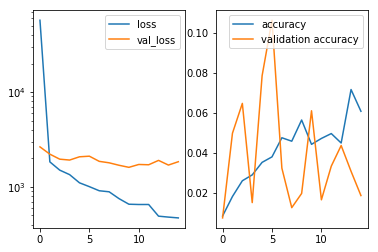

Epoch 16/200
 48/400 [==>...........................] - ETA: 26s - loss: 393.3202 - acc: 0.0428

KeyboardInterrupt: 

In [28]:
odmodel.fit(255 - imgs_o,imgs_gt,validation_split = 0.2,epochs=200,callbacks=callbacks_list,batch_size=8)
#odmodel.save('vgg19_aug_inverter_on_all_imagesx6.h5')

In [9]:
odmodel.save('RN_1_160.h5')

In [10]:
odmodel = load_model('RN_1_160.h5',backbone_name='resnet50')

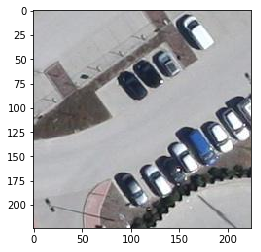

In [11]:
plt.imshow(imgs_o[298],vmin=0,vmax=255)

In [12]:
test = imgs_o[298:300]
test = np.asarray(test)
test.reshape((2,224,224,3))
prediction = odmodel.predict(test)

In [13]:
print(prediction.shape)
out = prediction[0]
print(out.shape)
out = out.reshape((224,224))
print(out.shape)


(2, 224, 224, 1)
(224, 224, 1)
(224, 224)


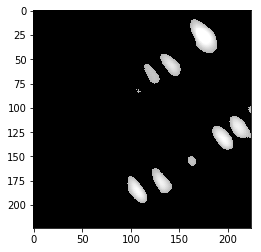

In [14]:
temp = out
temp[temp<180]=0
plt.imshow(temp,cmap = 'gray',vmin=0,vmax=255)